In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, imread
import keras
import os
import time
# import cPickle
from keras.layers import Input
from keras.models import Model
from keras_csp import config, bbox_process
from keras_csp.utilsfunc import *
from keras_csp import resnet50 as nn

C = config.Config()
C.offset = True
cache_path = 'data/cache/caltech/test'
# with open(cache_path, 'rb') as fid:
#     val_data = cPickle.load(fid)
# num_imgs = len(val_data)
# print 'num of val samples: {}'.format(num_imgs)

C.size_test = (960, 1280)
input_shape_img = (C.size_test[0], C.size_test[1], 3)

img_input = Input(shape=input_shape_img)

# define the network prediction
preds = nn.nn_p3p4p5(img_input, offset=C.offset, num_scale=C.num_scale, trainable=True)
# preds = nn.nn_p3p4p5(img_input)
model = Model(img_input, preds)

Using TensorFlow backend.


In [2]:
%%bash
ls /sharedfolder/caltech/fromcity

net_e82_l0.00850005054218.hdf5


In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1502, 960, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 1508, 966, 3) 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 751, 480, 64) 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 751, 480, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [2]:
model.load_weights('/sharedfolder/caltech/fromcity/net_e82_l0.00850005054218.hdf5', by_name=True)

In [5]:
keras.utils.plot_model(model, to_file='resnet.png')

In [6]:
%%bash
ls /sharedfolder/testimgs

DCup.jpeg


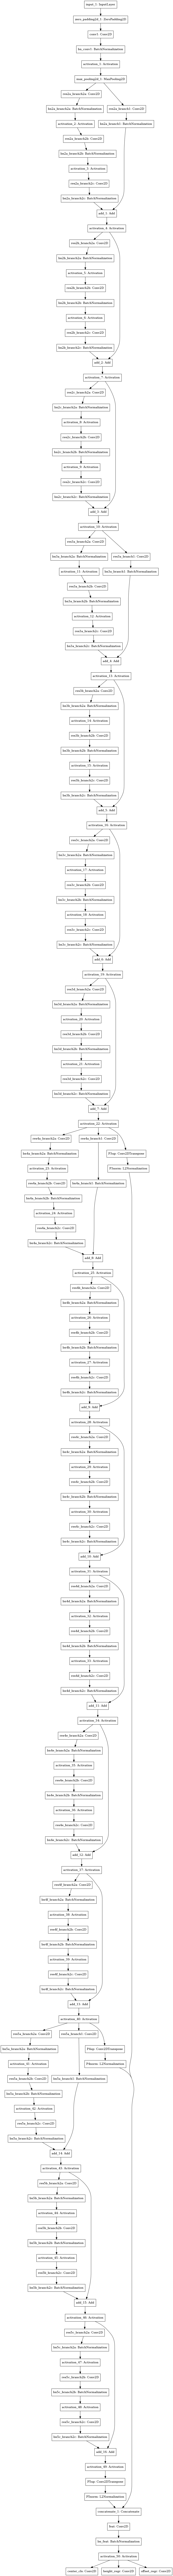

In [7]:
from IPython.display import Image
Image(filename='resnet.png')

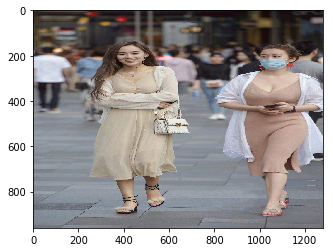

In [5]:
import cv2
img = imread('/sharedfolder/testimgs/DCup.jpeg')
img = cv2.resize(img, (1280, 960))
imshow(img)

In [6]:
x_rcnn = format_img(img, C)
Y = model.predict(x_rcnn)
# boxes = bbox_process.parse_det(Y, C, score=0.1,down=4)
boxes = bbox_process.parse_det_offset(Y, C, score=0.1,down=4)
len(boxes)

31

In [61]:
# boxes[[True, True, False, False, False, False]]
boxes[boxes[:, 4]>0.3]

array([[4.4452887e+02, 7.4063591e+01, 6.1349927e+02, 4.8000000e+02,
        5.6264609e-01],
       [1.2258811e+02, 5.3348011e+01, 2.9552811e+02, 4.7515289e+02,
        3.2293308e-01]], dtype=float32)

(31, 5)


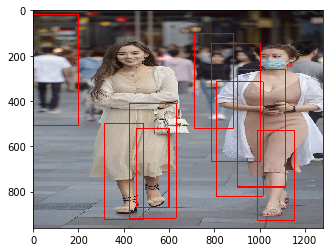

In [7]:
# plt.rcParams['figure.dpi'] = 400
print(boxes.shape)
for box in boxes[boxes[:, 4]>0.3]:
    
    x1, y1, x2, y2, _ = box
    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 4)

imshow(img)